haz_real = pd.read_pickle("haz_real_domain3.p")
haz_genu = pd.read_pickle("haz_uniform_domain3.p")
haz_gen = pd.read_pickle("haz_nonuniform_domain3.p")
nohaz_real = pd.read_pickle("nohaz_real_domain3.p")
nohaz_genu = pd.read_pickle("nohaz_uniform_domain3.p")
nohaz_gen = pd.read_pickle("nohaz_nonuniform_domain3.p")

In [1]:
#UNDER XX

from copy import copy, deepcopy
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib as mpl


In [2]:
haz_real = pd.read_pickle("haz_real_domain1.p")
haz_real_rest = pd.read_pickle("haz_real_domain1_rest.p")
haz_genu = pd.read_pickle("haz_uniform_domain1.p")
haz_genu_rest = pd.read_pickle("haz_uniform_domain1_rest.p")
haz_gen = pd.read_pickle("haz_nonuniform_domain1.p") 
haz_gen_rest = pd.read_pickle("haz_nonuniform_domain1_rest.p") 
nohaz_real = pd.read_pickle("nohaz_real_domain1.p") 
nohaz_real_rest = pd.read_pickle("nohaz_real_domain1_rest.p") 
nohaz_genu = pd.read_pickle("nohaz_uniform_domain1.p") 
nohaz_genu_rest = pd.read_pickle("nohaz_uniform_domain1_rest.p") 
nohaz_gen = pd.read_pickle("nohaz_nonuniform_domain1.p")
nohaz_gen_rest = pd.read_pickle("nohaz_nonuniform_domain1_rest.p")

In [3]:
print(len(haz_real))
print(len(haz_real_rest))
print(len(nohaz_real))
print(len(nohaz_real_rest))
print(len(haz_gen))
print(len(haz_gen_rest))
print(len(nohaz_gen))
print(len(nohaz_gen_rest))
print(len(haz_genu))
print(len(haz_genu_rest))
print(len(nohaz_genu))
print(len(nohaz_genu_rest))

4944
3995
3057
2493
33088
63178
63564
40170
2326
6613
157
5393


In [4]:
print(haz_real)

      neo  pha       H         e            a         q          i   
1       Y    Y  15.600  0.335440     1.245302  0.827578  13.337348  \
5       Y    Y  16.000  0.299182     1.290100  0.904126  64.006898   
6       Y    Y  17.940  0.503020     1.599550  0.794944  23.060625   
9       Y    Y  14.000  0.423060     1.768890  1.020543  22.142394   
13      Y    Y  16.400  0.541544     2.198616  1.007970  13.534389   
...   ...  ...     ...       ...          ...       ...        ...   
8844    Y    N  25.073  0.322401     1.329896  0.901137  23.766020   
8847    Y    Y  20.400  0.664688     2.812945  0.943214   4.695700   
8850    Y  NaN     NaN  0.710438     3.497747  1.012815  31.997421   
8865    Y  NaN     NaN  0.693358     3.334075  1.022367  11.048181   
8926  NaN  NaN     NaN  1.000297 -3418.615800  1.014834  62.532810   

              om           w      moid  
1     337.195397  276.915042  0.029829  
5      94.362447   61.539398  0.043465  
6     191.210111  290.860001  0.0101

In [5]:


split_value=1.066
haz_real_dom1=haz_real[haz_real['q']<=split_value]
haz_real_dom1__=haz_real[haz_real['q']>split_value]
haz_gen_dom1=haz_gen[haz_gen['q']<=split_value]
haz_gen_dom1__=haz_gen[haz_gen['q']>split_value]
haz_genu_dom1=haz_genu[haz_genu['q']<=split_value]
haz_genu_dom1__=haz_genu[haz_genu['q']>split_value]

In [6]:
nohaz_real_dom1=nohaz_real[nohaz_real['q']<=split_value]
nohaz_real_dom1__=nohaz_real[nohaz_real['q']>split_value]
nohaz_gen_dom1=nohaz_gen[nohaz_gen['q']<=split_value]
nohaz_gen_dom1__=nohaz_gen[nohaz_gen['q']>split_value]
nohaz_genu_dom1=nohaz_genu[nohaz_genu['q']<=split_value]
nohaz_genu_dom1__=nohaz_genu[nohaz_genu['q']>split_value]

In [11]:
print(len(haz_gen_dom1)+len(nohaz_gen_dom1))
print(len(haz_gen_dom1__)+len(nohaz_gen_dom1__))
print(len(haz_real_dom1)+len(nohaz_real_dom1))

92896
3756
7542


In [8]:
def get_atiras(database):
    db1 = database[database.a <= 1.0]
    Q = db1.a * 2 - db1.q
    Q_fit = Q[Q <= 0.983]
    db2 = db1.loc[Q_fit.index]
    return db2, len(db2)

In [9]:
haz_gen_atiras, haz_gen_atiras_num = get_atiras(haz_gen_dom1)
nohaz_gen_atiras, nohaz_gen_atiras_num = get_atiras(nohaz_gen_dom1)
atiras_gen_num = haz_gen_atiras_num + nohaz_gen_atiras_num

haz_real_atiras, haz_real_atiras_num = get_atiras(haz_real_dom1)
nohaz_real_atiras, nohaz_real_atiras_num = get_atiras(nohaz_real_dom1)
atiras_real_num = haz_real_atiras_num + nohaz_real_atiras_num

In [10]:
print(atiras_gen_num)
print(atiras_real_num)

92144
5


In [12]:
def get_atens(database):
    db1 = database[database.a <= 1.0]
    Q = db1.a * 2 - db1.q
    Q_fit = Q[Q >= 0.983]
    db2 = db1.loc[Q_fit.index]
    return db2, len(db2)

In [13]:
haz_gen_atens, haz_gen_atens_num = get_atens(haz_gen_dom1)
nohaz_gen_atens, nohaz_gen_atens_num = get_atens(nohaz_gen_dom1)
atens_gen_num = haz_gen_atens_num + nohaz_gen_atens_num

haz_real_atens, haz_real_atens_num = get_atens(haz_real_dom1)
nohaz_real_atens, nohaz_real_atens_num = get_atens(nohaz_real_dom1)
atens_real_num = haz_real_atens_num + nohaz_real_atens_num

In [14]:
print( "Number of virtual Atiras:", atiras_gen_num)
print( "Number of real Atiras:", atiras_real_num)

Number of virtual Atiras: 92144
Number of real Atiras: 5


In [15]:
haz_gen_atiras_atens = pd.concat((haz_gen_atiras, haz_gen_atens))
nohaz_gen_atiras_atens = pd.concat((nohaz_gen_atiras, nohaz_gen_atens))

haz_gen_atiras_atens_num = len(haz_gen_atiras_atens)
nohaz_gen_atiras_atens_num = len(nohaz_gen_atiras_atens)
atiras_atens_gen_num = haz_gen_atiras_atens_num + nohaz_gen_atiras_atens_num

haz_real_atiras_atens = pd.concat((haz_real_atiras, haz_real_atens))
nohaz_real_atiras_atens = pd.concat((nohaz_real_atiras, nohaz_real_atens))

haz_real_atiras_atens_num = len(haz_real_atiras_atens)
nohaz_real_atiras_atens_num = len(nohaz_real_atiras_atens)
atiras_atens_real_num = haz_real_atiras_atens_num + nohaz_real_atiras_atens_num

In [16]:
print( "Number of virtual Atens:", atens_gen_num)
print ("Number of real Atens:", atens_real_num)

Number of virtual Atens: 12
Number of real Atens: 75


In [19]:
print( "Number of virtual PHAs in the group:", haz_gen_atiras_atens_num)
print ("Number of virtual NHAs in the group:", nohaz_gen_atiras_atens_num)
print ("Number of virtual Atiras and Atens:", atiras_atens_gen_num)

Number of virtual PHAs in the group: 32751
Number of virtual NHAs in the group: 59405
Number of virtual Atiras and Atens: 92156


In [20]:
print ("Number of real PHAs in the group:", haz_real_atiras_atens_num)
print ("Number of real NHAs in the group:", nohaz_real_atiras_atens_num)
print ("Number of real Atiras and Atens:", atiras_atens_real_num)

Number of real PHAs in the group: 71
Number of real NHAs in the group: 9
Number of real Atiras and Atens: 80


In [21]:
import matplotlib.pyplot as plt

In [22]:
haz_gen_atiras_atens=haz_gen_atiras_atens.sample(n=1500)
nohaz_gen_atiras_atens=nohaz_gen_atiras_atens.sample(n=700)

In [25]:
haz_gen_atiras_atens=haz_gen_atiras_atens.reset_index(drop=True)
nohaz_gen_atiras_atens=nohaz_gen_atiras_atens.reset_index(drop=True)
print(haz_gen_atiras_atens)

               a         i           w        om         q         e      moid
0     -32.636362  5.412500  358.379968 -0.031089  1.042860  1.031954  0.038944
1     -13.985063  7.814077  129.121725  0.019112  0.921279  1.065876  0.043721
2    -432.291972  4.223489   71.222768 -0.037916  0.833325  1.001928  0.028961
3     -74.660880  3.639481   77.905751 -0.000583  0.760605  1.010187  0.021259
4     -13.330963  2.970871  271.475891 -0.033341  0.898588  1.067406  0.039974
...          ...       ...         ...       ...       ...       ...       ...
1495 -164.213830  7.539364  344.629037 -0.017332  1.037223  1.006316  0.040330
1496 -373.736950  5.218524  110.413747  0.019517  0.774265  1.002072  0.021128
1497  -43.518070  3.376862   95.149040  0.011323  0.861001  1.019785  0.039701
1498 -429.489814  2.762172  332.522695  0.038854  1.036993  1.002414  0.034418
1499 -113.147917  5.984364  253.919867  0.017864  0.791106  1.006992  0.034302

[1500 rows x 7 columns]


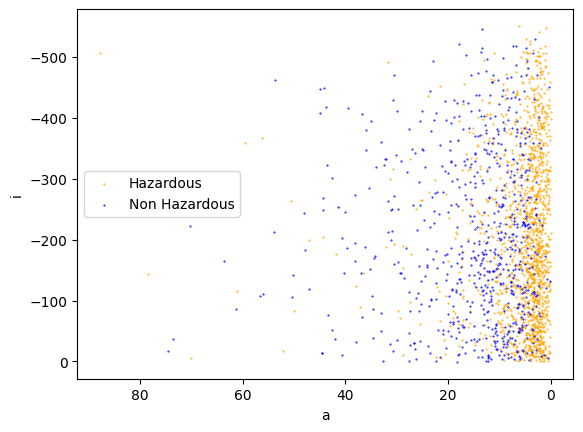

<Figure size 640x480 with 0 Axes>

In [29]:
plt.scatter(haz_gen_atiras_atens['i'],haz_gen_atiras_atens['a'],c='orange',label='Hazardous',s=0.2)
plt.scatter(nohaz_gen_atiras_atens['i'],nohaz_gen_atiras_atens['a'],c='blue',label='Non Hazardous',s=0.2)
plt.legend()
plt.xlabel('a')
plt.ylabel('i')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()
plt.clf()
# plt.legend()
# plt.xlabel('a')
# plt.ylabel('i')
# plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
# plt.show()
# plt.clf()

In [30]:
def normalized_df(df):
    for cols in df.columns:
        df.loc[:, cols] = (df[cols] - df[cols].min()) / (df[cols].max() - df[cols].min())
    return df

In [31]:
cutcol = ['a', 'i']
haz_gen_cut=haz_gen_atiras_atens[cutcol]
haz_gen_cut=normalized_df(haz_gen_cut)
haz_gen_cut=haz_gen_cut.reset_index(drop=True)
nohaz_gen_cut=nohaz_gen_atiras_atens[cutcol]
nohaz_gen_cut=normalized_df(nohaz_gen_cut)
nohaz_gen_cut=nohaz_gen_cut.reset_index(drop=True)
haz_real_cut=haz_real_atiras_atens[cutcol]
haz_real_cut=normalized_df(haz_real_cut)
haz_real_cut=haz_real_cut.reset_index(drop=True)
nohaz_real_cut=nohaz_real_atiras_atens[cutcol]
nohaz_real_cut=normalized_df(nohaz_real_cut)
nohaz_real_cut=nohaz_real_cut.reset_index(drop=True)

In [32]:
def append_phacol(hazarr, nohazarr):
    """Appends PHA id column to the PHA and NHA arrays."""

    num_haz, num_nohaz = len(hazarr), len(nohazarr)
    phacol = np.reshape(np.ones(num_haz), (num_haz, 1))
    nophacol = np.reshape(np.zeros(num_nohaz), (num_nohaz, 1))

    hazarr_ = np.append(hazarr, phacol, axis=1)
    nohazarr_ = np.append(nohazarr, nophacol, axis=1)
    return hazarr_, nohazarr_

In [33]:
labelled_haz_gen_cut,labelled_nohaz_gen_cut=append_phacol(haz_gen_cut.to_numpy(),nohaz_gen_cut.to_numpy())
join_data=np.concatenate((labelled_haz_gen_cut,labelled_nohaz_gen_cut))
print(join_data)

[[0.94124833 0.06133636 1.        ]
 [0.97511237 0.08869945 1.        ]
 [0.21561764 0.047789   1.        ]
 ...
 [0.45268579 0.1775897  0.        ]
 [0.72722129 0.159811   0.        ]
 [0.49086811 0.30137992 0.        ]]


In [34]:
x_train=join_data[:,:2]
y_train=join_data[:,2]
print(len(x_train))
print(len(y_train))

2200
2200


In [35]:
clf_atiras_atens_ai = svm.LinearSVC(dual='auto')
clf_atiras_atens_ai=clf_atiras_atens_ai.fit(x_train,y_train)

In [36]:
# predicted_gen=clf_atiras_atens_ai.predict()
y=[1]*len(haz_gen_cut)
print(clf_atiras_atens_ai.score(haz_gen_cut,y))

0.95


C:\Users\bipan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


In [37]:
labelled_haz_real_cut,labelled_nohaz_real_cut=append_phacol(haz_real_cut.to_numpy(),nohaz_real_cut.to_numpy())
join_data_real=np.concatenate((labelled_haz_real_cut,labelled_nohaz_real_cut))

In [39]:
y=[0]*len(nohaz_gen_cut)
print(clf_atiras_atens_ai.score(nohaz_gen_cut,y))
y=[1]*len(haz_real_cut)
print(clf_atiras_atens_ai.score(haz_real_cut,y))
y=[0]*len(nohaz_real_cut)
print(clf_atiras_atens_ai.score(nohaz_real_cut,y))

0.39571428571428574
0.7746478873239436
0.7777777777777778


C:\Users\bipan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
C:\Users\bipan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
C:\Users\bipan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


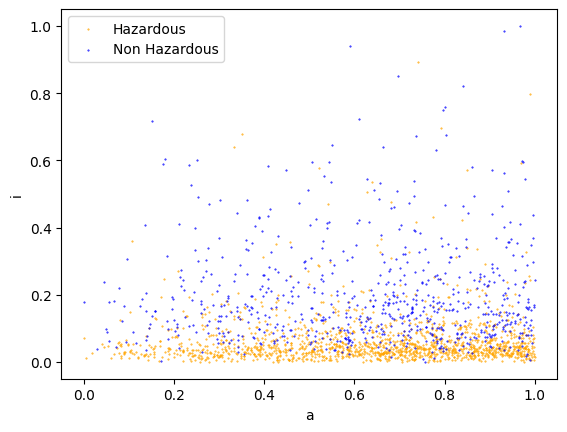

<Figure size 640x480 with 0 Axes>

In [40]:
plt.scatter(haz_gen_cut['a'],haz_gen_cut['i'],c='orange',label='Hazardous',s=0.2)
plt.scatter(nohaz_gen_cut['a'],nohaz_gen_cut['i'],c='blue',label='Non Hazardous',s=0.2)
plt.legend()
plt.xlabel('a')
plt.ylabel('i')
plt.show()
plt.clf()

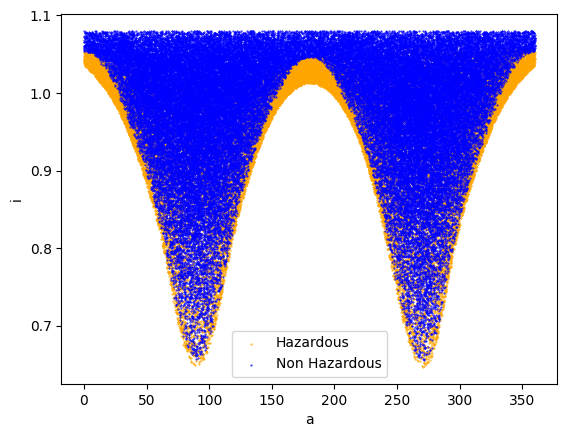

<Figure size 640x480 with 0 Axes>

In [41]:
plt.scatter(haz_gen['w'],haz_gen['q'],c='orange',label='Hazardous',s=0.2)
plt.scatter(nohaz_gen['w'],nohaz_gen['q'],c='blue',label='Non Hazardous',s=0.2)
plt.legend()
plt.xlabel('a')
plt.ylabel('i')
plt.show()
plt.clf()

In [42]:
def clf_split_quality(clf, haz_cut, nohaz_cut, verbose=True):
    """
    Calculates and displays quality of the NEAs division into PHA 
    and NHA regions by classifier.
    """

    haz_clf = clf.predict(haz_cut)
    nohaz_clf = clf.predict(nohaz_cut)
    
    haz_1 = np.where(haz_clf == 1)[0]
    nohaz_1 = np.where(nohaz_clf == 1)[0]
    haz_0 = np.where(haz_clf == 0)[0]
    nohaz_0 = np.where(nohaz_clf == 0)[0]
      
    # floatlen = lambda db: float(len(db))
    haz_1num, nohaz_1num = map(len, [haz_1, nohaz_1])
    haz_0num, nohaz_0num = map(len, [haz_0, nohaz_0])
    
    haz_purity = haz_1num/(haz_1num + nohaz_1num)
    nohaz_purity = nohaz_0num/(haz_0num + nohaz_0num)
    
    if verbose:
        print ("purity of PHA region:", haz_purity)
        print ("number of PHAs in the PHA region:", haz_1num)
        print ("number of NHAs in the PHA region:", nohaz_1num)
        print()
        print ("purity of NHA region:", nohaz_purity)
        print( "number of PHAs in the NHA region:", haz_0num)
        print ("number of NHAs in the NHA region:", nohaz_0num)
        print()
        print ("fraction of correctly classified PHAs:", haz_1num/len(haz_cut))
    return haz_1, nohaz_1, haz_0, nohaz_0

In [43]:
predicted_real = clf_split_quality(clf_atiras_atens_ai, haz_real_cut, nohaz_real_cut)

haz_real_atiras_atens_ai = haz_real_atiras_atens.iloc[predicted_real[0]]
nohaz_real_atiras_atens_ai = haz_real_atiras_atens.iloc[predicted_real[1]]

haz_real_atiras_atens_ai__ = haz_real_atiras_atens.iloc[predicted_real[2]]
nohaz_real_atiras_atens_ai__ = haz_real_atiras_atens.iloc[predicted_real[3]]

purity of PHA region: 0.9649122807017544
number of PHAs in the PHA region: 55
number of NHAs in the PHA region: 2

purity of NHA region: 0.30434782608695654
number of PHAs in the NHA region: 16
number of NHAs in the NHA region: 7

fraction of correctly classified PHAs: 0.7746478873239436


C:\Users\bipan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
C:\Users\bipan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


In [44]:
predicted_gen = clf_split_quality(clf_atiras_atens_ai, haz_gen_cut, nohaz_gen_cut)

haz_gen_atiras_atens_ai = haz_gen_atiras_atens.iloc[predicted_gen[0]]
nohaz_gen_atiras_atens_ai = haz_gen_atiras_atens.iloc[predicted_gen[1]]

haz_gen_atiras_atens_ai__ = haz_gen_atiras_atens.iloc[predicted_gen[2]]
nohaz_gen_atiras_atens_ai__ = haz_gen_atiras_atens.iloc[predicted_gen[3]]

purity of PHA region: 0.7711038961038961
number of PHAs in the PHA region: 1425
number of NHAs in the PHA region: 423

purity of NHA region: 0.7869318181818182
number of PHAs in the NHA region: 75
number of NHAs in the NHA region: 277

fraction of correctly classified PHAs: 0.95


C:\Users\bipan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(
C:\Users\bipan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


# APPOLO

In [45]:
def get_apollos(database):
    db1 = database[database.a >= 1.0]
    db2 = db1[db1.q <= 1.017]
    return db2, len(db2)

In [46]:
haz_gen_apollo, haz_gen_apollo_num = get_apollos(haz_gen_dom1)
nohaz_gen_apollo, nohaz_gen_apollo_num = get_apollos(nohaz_gen_dom1)
apollo_gen_num = haz_gen_apollo_num + nohaz_gen_apollo_num

haz_real_apollo, haz_real_apollo_num = get_apollos(haz_real_dom1)
nohaz_real_apollo, nohaz_real_apollo_num = get_apollos(nohaz_real_dom1)
apollo_real_num = haz_real_apollo_num + nohaz_real_apollo_num

In [47]:
print( "Number of virtual PHAs in the group:", haz_gen_apollo_num)
print( "Number of virtual NHAs in the group:", nohaz_gen_apollo_num)
print ("Number of virtual Apollo:", apollo_gen_num)

Number of virtual PHAs in the group: 282
Number of virtual NHAs in the group: 252
Number of virtual Apollo: 534


In [48]:
print ("Number of real PHAs in the group:", haz_real_apollo_num)
print( "Number of real NHAs in the group:", nohaz_real_apollo_num)
print( "Number of real Apollo:", apollo_real_num)

Number of real PHAs in the group: 4100
Number of real NHAs in the group: 1303
Number of real Apollo: 5403


In [49]:
def split_by_colval(dataset, colname, value):
    dataset_left = dataset[dataset[colname] <= value]
    dataset_right = dataset[dataset[colname] > value]
    return dataset_left, dataset_right

def add_doublemirror_column(dataset, colname, value):
    """ 
    Extends dataset by its mirrors over the 'value' and 
    the half 'value' of the 'colname'.
    """

    left, right = split_by_colval(dataset, colname, value)
    left_mir, right_mir = map(deepcopy, [left, right])
    left_mir[colname] = value - left[colname]
    right_mir[colname] = 3*value - right[colname]
    half_mirror = pd.concat((left_mir, right_mir, dataset))

    dataset_mirror = deepcopy(half_mirror)
    dataset_mirror[colname] = value*2 - dataset_mirror[colname]
    dataset_extended = pd.concat((half_mirror, dataset_mirror))

    return dataset_extended

In [50]:
haz_gen_apollo_se = add_doublemirror_column(haz_gen_apollo, 'w', 180.0)
nohaz_gen_apollo_se = add_doublemirror_column(nohaz_gen_apollo, 'w', 180.0)

In [51]:
haz_gen_apollo_bq = haz_gen_apollo[haz_gen_apollo.q > 0.7]
nohaz_gen_apollo_bq = nohaz_gen_apollo[nohaz_gen_apollo.q > 0.7]

haz_gen_apollo_sq = haz_gen_apollo[haz_gen_apollo.q <= 0.7]
nohaz_gen_apollo_sq = nohaz_gen_apollo[nohaz_gen_apollo.q <= 0.7]

haz_gen_apollo_se_bq = haz_gen_apollo_se[haz_gen_apollo_se.q > 0.7]
nohaz_gen_apollo_se_bq = nohaz_gen_apollo_se[nohaz_gen_apollo_se.q > 0.7]

In [52]:
cutcol = ['w', 'q', 'i']
haz_gen_cut=haz_gen_apollo[cutcol]
haz_gen_cut=normalized_df(haz_gen_cut)
haz_gen_cut=haz_gen_cut.reset_index(drop=True)
nohaz_gen_cut=nohaz_gen_apollo[cutcol]
nohaz_gen_cut=normalized_df(nohaz_gen_cut)
nohaz_gen_cut=nohaz_gen_cut.reset_index(drop=True)
haz_real_cut=haz_real_apollo[cutcol]
haz_real_cut=normalized_df(haz_real_cut)
haz_real_cut=haz_real_cut.reset_index(drop=True)
nohaz_real_cut=nohaz_real_apollo[cutcol]
nohaz_real_cut=normalized_df(nohaz_real_cut)
nohaz_real_cut=nohaz_real_cut.reset_index(drop=True)
haz_gen_se_cut=haz_gen_apollo_se_bq[cutcol]
haz_gen_se_cut=normalized_df(haz_gen_se_cut)
haz_gen_se_cut=haz_gen_se_cut.reset_index(drop=True)
nohaz_gen_se_cut=nohaz_gen_apollo_se_bq[cutcol]
nohaz_gen_se_cut=normalized_df(nohaz_gen_se_cut)
nohaz_gen_se_cut=nohaz_gen_se_cut.reset_index(drop=True)

In [53]:
clf_apollo_wqi = svm.SVC(gamma=40.0, C=0.05, class_weight={0: 1.2})

In [54]:
labelled_haz_gen_se_cut,labelled_nohaz_gen_se_cut=append_phacol(haz_gen_se_cut.to_numpy(),nohaz_gen_se_cut.to_numpy())
join_data3=np.concatenate((labelled_haz_gen_se_cut,labelled_nohaz_gen_se_cut))

In [55]:
print(join_data3)

[[0.21808547 0.89106647 0.01414138 1.        ]
 [0.1252646  0.98434608 0.03076383 1.        ]
 [0.14574172 0.69766714 0.16681117 1.        ]
 ...
 [0.20319706 0.85140465 0.05139969 0.        ]
 [0.18479725 0.89296977 0.00292229 0.        ]
 [0.82154419 0.80179143 0.1085138  0.        ]]


In [58]:
x_train_apollo=join_data3[:,:3]
y_train_apollo=join_data3[:,3]

In [59]:
clf_apollo_wqi = clf_apollo_wqi.fit(x_train_apollo, y_train_apollo)

In [60]:
predicted_gen = clf_split_quality(clf_apollo_wqi, haz_gen_cut, nohaz_gen_cut)

haz_gen_apollo_wqi = haz_gen_apollo.iloc[predicted_gen[0]]
nohaz_gen_apollo_wqi = nohaz_gen_apollo.iloc[predicted_gen[1]]

haz_gen_apollo_wqi__ = haz_gen_apollo.iloc[predicted_gen[2]]
nohaz_gen_apollo_wqi__ = nohaz_gen_apollo.iloc[predicted_gen[3]]

purity of PHA region: 0.8693181818181818
number of PHAs in the PHA region: 153
number of NHAs in the PHA region: 23

purity of NHA region: 0.6396648044692738
number of PHAs in the NHA region: 129
number of NHAs in the NHA region: 229

fraction of correctly classified PHAs: 0.5425531914893617


C:\Users\bipan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\bipan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [61]:
predicted_real = clf_split_quality(clf_apollo_wqi, haz_real_cut, nohaz_real_cut)

haz_real_apollo_wqi = haz_real_apollo.iloc[predicted_real[0]]
nohaz_real_apollo_wqi = nohaz_real_apollo.iloc[predicted_real[1]]

haz_real_apollo_wqi__ = haz_real_apollo.iloc[predicted_real[2]]
nohaz_real_apollo_wqi__ = nohaz_real_apollo.iloc[predicted_real[3]]

C:\Users\bipan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\bipan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


purity of PHA region: 0.9551219512195122
number of PHAs in the PHA region: 1958
number of NHAs in the PHA region: 92

purity of NHA region: 0.36116910229645094
number of PHAs in the NHA region: 2142
number of NHAs in the NHA region: 1211

fraction of correctly classified PHAs: 0.4775609756097561


AMORS